Run on NERSC

In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

--------
## DES region

In [3]:
sweep_list = ['sweep-000m005-010p000.fits', 'sweep-000p000-010p005.fits', 'sweep-010m005-020p000.fits', 'sweep-010p000-020p005.fits']

cat = []
columns = ['RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'GAIA_ASTROMETRIC_EXCESS_NOISE', 'MASKBITS']
for sweep_fn in sweep_list:
    tmp = fitsio.read('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/'+sweep_fn, columns=['GAIA_PHOT_G_MEAN_MAG'])
    idx = np.where(tmp['GAIA_PHOT_G_MEAN_MAG']!=0)[0]
    tmp = fitsio.read('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/'+sweep_fn, rows=idx, columns=columns)
    tmp = Table(tmp)
    print(len(tmp))
    cat.append(tmp)

cat = vstack(cat)
print('\n', len(cat))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G']/cat['MW_TRANSMISSION_G'])
    # cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R']/cat['MW_TRANSMISSION_R'])
    # cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z']/cat['MW_TRANSMISSION_Z'])
    # cat['w1mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W1']/cat['MW_TRANSMISSION_W1'])
    # cat['w2mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W2']/cat['MW_TRANSMISSION_W2'])
    cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
    cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
    cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
    cat['w1mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W1'])
    cat['w2mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W2'])

# restrict to DES region
mask = (cat['DEC']<4.) & (cat['DEC']>-4.)
cat = cat[mask]
    
mask = np.isfinite(cat['gmag']) & np.isfinite(cat['rmag']) & np.isfinite(cat['zmag'])
print(np.sum(mask)/len(mask))
cat = cat[mask]

142052
150321
134402
137854

 564629
0.996295788174


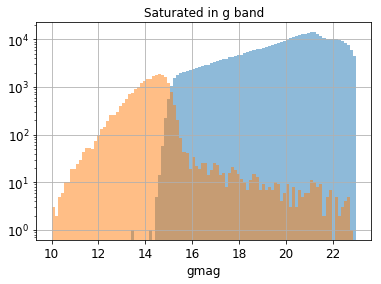

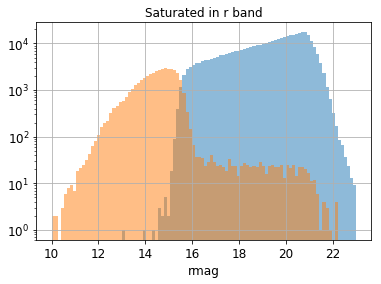

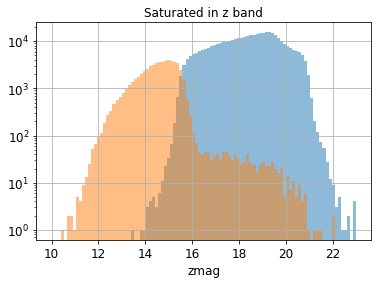

In [4]:
for maskbit, band in zip([2, 3, 4], ['g', 'r', 'z']):
    mask = (cat['MASKBITS']&(2**maskbit)>0)
    plt.hist(cat[band+'mag'][~mask], 100, alpha=0.5, range=(10, 23), log=True)
    plt.hist(cat[band+'mag'][mask], 100, alpha=0.5, range=(10, 23), log=True)
    plt.xlabel(band+'mag')
    plt.title('Saturated in {} band'.format(band))
    plt.grid()
    plt.show()

--------
## DECaLS region

In [5]:
sweep_list = ['sweep-180p000-190p005.fits', 'sweep-180p005-190p010.fits', 'sweep-190p000-200p005.fits', 'sweep-190p005-200p010.fits']

cat = []
columns = ['FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'GAIA_ASTROMETRIC_EXCESS_NOISE', 'PARALLAX', 'PARALLAX_IVAR', 'MASKBITS']
for sweep_fn in sweep_list:
    tmp = fitsio.read('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/'+sweep_fn, columns=['GAIA_PHOT_G_MEAN_MAG'])
    idx = np.where(tmp['GAIA_PHOT_G_MEAN_MAG']!=0)[0]
    tmp = fitsio.read('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/'+sweep_fn, rows=idx, columns=columns)
    tmp = Table(tmp)
    print(len(tmp))
    cat.append(tmp)

cat = vstack(cat)
print('\n', len(cat))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G']/cat['MW_TRANSMISSION_G'])
    # cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R']/cat['MW_TRANSMISSION_R'])
    # cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z']/cat['MW_TRANSMISSION_Z'])
    # cat['w1mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W1']/cat['MW_TRANSMISSION_W1'])
    # cat['w2mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W2']/cat['MW_TRANSMISSION_W2'])
    cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
    cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
    cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
    cat['w1mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W1'])
    cat['w2mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W2'])
    
mask = np.isfinite(cat['gmag']) & np.isfinite(cat['rmag']) & np.isfinite(cat['zmag'])
print(np.sum(mask)/len(mask))
cat = cat[mask]

172502
156581
187854
173088

 690025
0.996094344408


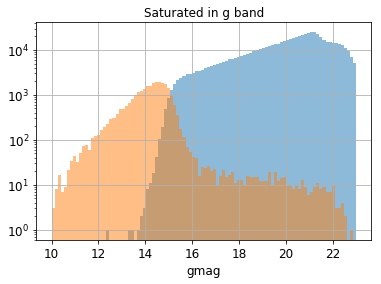

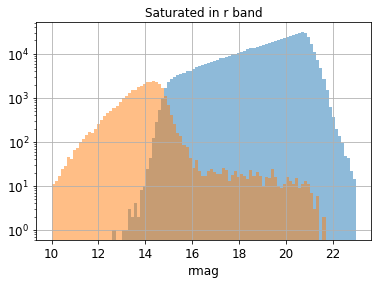

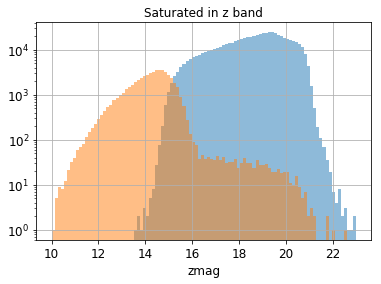

In [6]:
for maskbit, band in zip([2, 3, 4], ['g', 'r', 'z']):
    mask = (cat['MASKBITS']&(2**maskbit)>0)
    plt.hist(cat[band+'mag'][~mask], 100, alpha=0.5, range=(10, 23), log=True)
    plt.hist(cat[band+'mag'][mask], 100, alpha=0.5, range=(10, 23), log=True)
    plt.xlabel(band+'mag')
    plt.title('Saturated in {} band'.format(band))
    plt.grid()
    plt.show()

--------
## BASS/MzLS region

In [7]:
sweep_list = ['sweep-180p035-190p040.fits', 'sweep-180p040-190p045.fits', 'sweep-190p035-200p040.fits', 'sweep-190p040-200p045.fits', ]

cat = []
columns = ['FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG', 'GAIA_PHOT_RP_MEAN_MAG', 'GAIA_ASTROMETRIC_EXCESS_NOISE', 'PARALLAX', 'PARALLAX_IVAR', 'MASKBITS']
for sweep_fn in sweep_list:
    tmp = fitsio.read('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/north/sweep/8.0/'+sweep_fn, columns=['GAIA_PHOT_G_MEAN_MAG'])
    idx = np.where(tmp['GAIA_PHOT_G_MEAN_MAG']!=0)[0]
    tmp = fitsio.read('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/north/sweep/8.0/'+sweep_fn, rows=idx, columns=columns)
    tmp = Table(tmp)
    print(len(tmp))
    cat.append(tmp)

cat = vstack(cat)
print('\n', len(cat))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G']/cat['MW_TRANSMISSION_G'])
    # cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R']/cat['MW_TRANSMISSION_R'])
    # cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z']/cat['MW_TRANSMISSION_Z'])
    # cat['w1mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W1']/cat['MW_TRANSMISSION_W1'])
    # cat['w2mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W2']/cat['MW_TRANSMISSION_W2'])
    cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
    cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
    cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
    cat['w1mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W1'])
    cat['w2mag'] = 22.5 - 2.5*np.log10(cat['FLUX_W2'])
    
mask = np.isfinite(cat['gmag']) & np.isfinite(cat['rmag']) & np.isfinite(cat['zmag'])
print(np.sum(mask)/len(mask))
cat = cat[mask]

91910
89295
99940
94624

 375769
0.995364173202


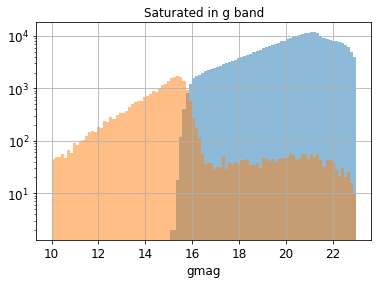

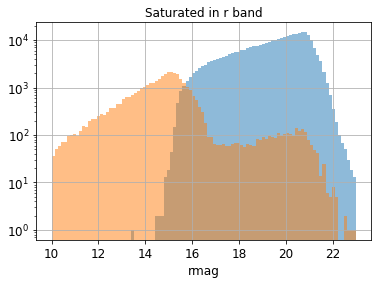

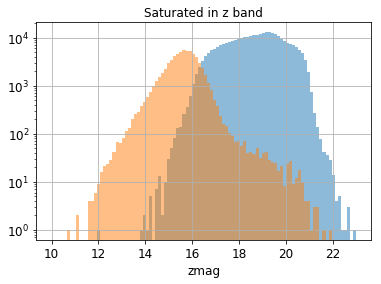

In [8]:
for maskbit, band in zip([2, 3, 4], ['g', 'r', 'z']):
    mask = (cat['MASKBITS']&(2**maskbit)>0)
    plt.hist(cat[band+'mag'][~mask], 100, alpha=0.5, range=(10, 23), log=True)
    plt.hist(cat[band+'mag'][mask], 100, alpha=0.5, range=(10, 23), log=True)
    plt.xlabel(band+'mag')
    plt.title('Saturated in {} band'.format(band))
    plt.grid()
    plt.show()